## 参考
https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/basics/getting_started_with_qiskit.ipynb
https://github.com/soneo1127/Quantum_computing_from_Zero/

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import circuit_drawer, plot_histogram, plot_bloch_multivector

import numpy as np

## 1量子ビットのシミュレート

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
# https://qiskit.org/aer, https://github.com/Qiskit/qiskit-aer

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.measure(q, c)

In [6]:
job = execute(circuit, backend, shots=100)
result = job.result()
result.get_counts(circuit)

{'0': 100}

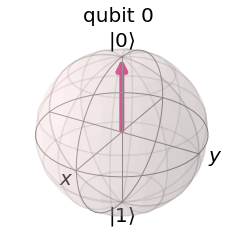

In [8]:
# Bloch球
backend_statevector = BasicAer.get_backend('statevector_simulator')
circuit = QuantumCircuit(q, c)
# https://qiskit.org/documentation/autodoc/qiskit.circuit.quantumcircuit.html?highlight=quantumcircuit#module-qiskit.circuit.quantumcircuit
circuit.iden(q[0])
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

In [10]:
q

QuantumRegister(1, 'q1')

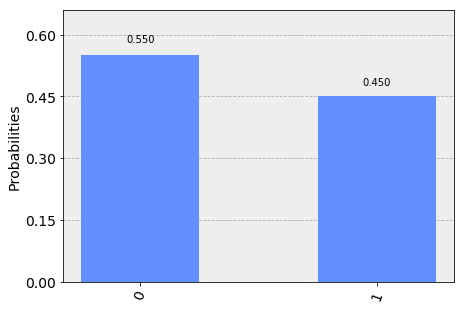

In [18]:
circuit = QuantumCircuit(q, c)
circuit.ry(np.pi / 2, q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

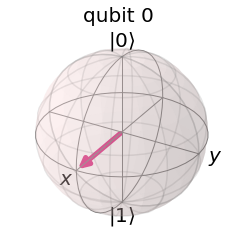

In [21]:
# ブロッホ球
circuit = QuantumCircuit(q, c)
circuit.ry(np.pi /2, q[0])
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

(QuantumRegister(2, 'q9'), 0)


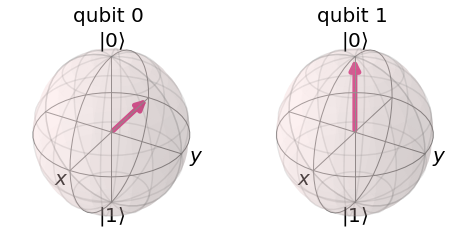

In [78]:
circuit = QuantumCircuit(q, c)
circuit.x(q[0])
print(q[0])
circuit.ry(np.pi/2, q[0]) # Y軸周りの回転
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

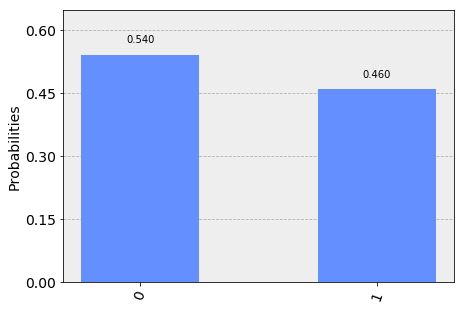

In [35]:
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

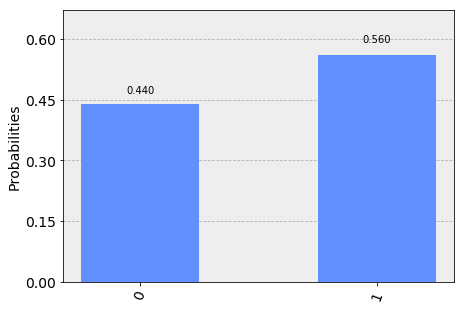

In [43]:
# 2回ryゲートを適用すると，1になる, 3回だとまたエンタングルになる
circuit = QuantumCircuit(q, c)
circuit.ry(np.pi/2, q[0])
circuit.ry(np.pi/2, q[0])
circuit.ry(np.pi/2, q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

## 多量子ビットとエンタングルメント

In [46]:
q0 = np.array([[1], [0]])
q1 = np.array([[1], [0]])
np.kron(q0, q1) # |00>

array([[1],
       [0],
       [0],
       [0]])

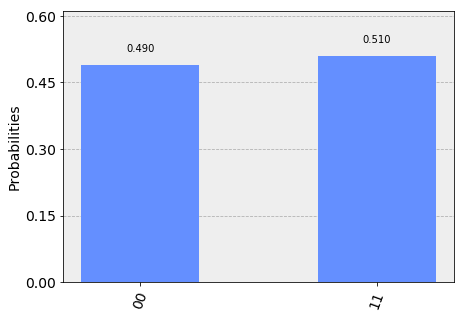

In [55]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

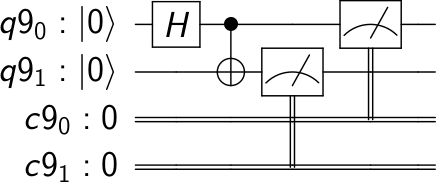

In [56]:
circuit_drawer(circuit)

In [60]:
### 密度行列
zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])

_0 = zero_ket.dot(zero_ket.T.conj())
_1 = one_ket.dot(one_ket.T.conj())
print(_0)
print(_1)

[[1 0]
 [0 0]]
[[0 0]
 [0 1]]


In [63]:
### 確率振幅
pusai = np.array([[1], [1]]) / np.sqrt(2)
print( pusai.T.conj().dot(_0.dot(pusai)) )
print( pusai.T.conj().dot(_1.dot(pusai)) )

[[0.5]]
[[0.5]]


In [73]:
prob_0 = pusai.T.conj().dot(_0.dot(pusai))
print(_0.dot(pusai) / np.sqrt(prob_0))

prob_1 = pusai.T.conj().dot(_1.dot(pusai))
print(_1.dot(pusai) / np.sqrt(prob_1))


[[1.]
 [0.]]
[[0.]
 [1.]]


In [76]:
zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])

pusai = (zero_ket + one_ket) / np.sqrt(2)
print('重ね合わせ状態の密度行列')
print(pusai.dot(pusai.T.conj()))
# 密度行列の非対角成分はコヒーレンスであり，この値が小さいと，古典的な状態に近づいていることを意味する
# シミュレータなので純粋な綺麗な値となっているが，実機だと重要らしい

print('混合状態の密度行列')
print((zero_ket.dot(zero_ket.T.conj()) + one_ket.dot(one_ket.T.conj())) / 2)

重ね合わせ状態の密度行列
[[0.5 0.5]
 [0.5 0.5]]
混合状態の密度行列
[[0.5 0. ]
 [0.  0.5]]


# コンパイラ

In [77]:
from qiskit import compile
compiled_circuit = compile(circuit, backend)
compiled_circuit.as_dict()['experiments'][0]['instructions']

[{'name': 'u2',
  'params': [0.0, 3.141592653589793],
  'texparams': ['0', '\\pi'],
  'qubits': [0],
  'memory': []},
 {'name': 'cx', 'params': [], 'texparams': [], 'qubits': [0, 1], 'memory': []},
 {'name': 'measure',
  'params': [],
  'texparams': [],
  'qubits': [0],
  'memory': [0]},
 {'name': 'measure',
  'params': [],
  'texparams': [],
  'qubits': [1],
  'memory': [1]}]